In [138]:
import pandas as pd                 # pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
import numpy as np                  # NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt     # matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.
import seaborn as sns               # seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

In [139]:
data=pd.read_csv('student-mat.csv', delimiter=';') # read the data from the csv file

In [140]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [141]:
data.failures
 # get the information about the data

0      0
1      0
2      3
3      0
4      0
      ..
390    2
391    0
392    3
393    0
394    0
Name: failures, Length: 395, dtype: int64

In [142]:
data=data.join(pd.get_dummies(data.school, dtype=int)).drop('school',axis=1) # get the dummies for the school column

data=data.join(pd.get_dummies(data.sex, dtype=int)).drop('sex',axis=1)

data=data.join(pd.get_dummies(data.Pstatus, dtype=int)).drop('Pstatus',axis=1)

data=data.join(pd.get_dummies(data.traveltime, dtype=int)).drop('traveltime',axis=1)
data.rename(columns={1: '(T)<15', 2: '(T)15-30', 3: '(T)30-1', 4: '(T)>1'}, inplace=True)

data=data.join(pd.get_dummies(data.studytime, dtype=int)).drop('studytime',axis=1)
data.rename(columns={1: '(S)<2', 2: '(S)2-5', 3: '(S)5-10', 4: '(S)>10'}, inplace=True)

data=data.join(pd.get_dummies(data.failures, dtype=int)).drop('failures',axis=1)
data.rename(columns={0: 'F0', 1: 'F1', 2: 'F2', 3: 'F3'}, inplace=True)


data=data.join(pd.get_dummies(data.famrel, dtype=int)).drop('famrel',axis=1)
data.rename(columns={1: 'very bad', 2: 'Bad', 3: 'Average', 4: 'Good', 5: 'Excellent'}, inplace=True)



In [144]:
data['schoolsup'].replace({'yes': 1, 'no': 0}, inplace=True)

data['famsup'].replace({'yes': 1, 'no': 0}, inplace=True)

data['paid'].replace({'yes': 1, 'no': 0}, inplace=True)

data['activities'].replace({'yes': 1, 'no': 0}, inplace=True)

data['nursery'].replace({'yes': 1, 'no': 0}, inplace=True)

data['higher'].replace({'yes': 1, 'no': 0}, inplace=True)

data['internet'].replace({'yes': 1, 'no': 0}, inplace=True)

data['romantic'].replace({'yes': 1, 'no': 0}, inplace=True)

In [145]:
data.drop(['address','famsize','Medu','Fedu','Mjob','Fjob','reason','guardian'], axis=1, inplace=True)

In [146]:
data.columns

Index(['age', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'GP', 'MS', 'F', 'M', 'A', 'T', '(T)<15',
       '(T)15-30', '(T)30-1', '(T)>1', '(S)<2', '(S)2-5', '(S)5-10', '(S)>10',
       'F0', 'F1', 'F2', 'F3', 'very bad', 'Bad', 'Average', 'Good',
       'Excellent'],
      dtype='object')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'schoolsup'}>,
        <Axes: title={'center': 'famsup'}>,
        <Axes: title={'center': 'paid'}>,
        <Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>],
       [<Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>,
        <Axes: title={'center': 'romantic'}>,
        <Axes: title={'center': 'freetime'}>,
        <Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>],
       [<Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>,
        <Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>],
       [<Axes: title={'center': 'GP'}>, <Axes: title={'center': 'MS'}>,
        <Axes: title={'center': 'F'}>, <Axes: title={'center': 'M'}>,
        <Axes: title={'center': 'A'}>, <Axes: title={'center': 'T'}>],
      

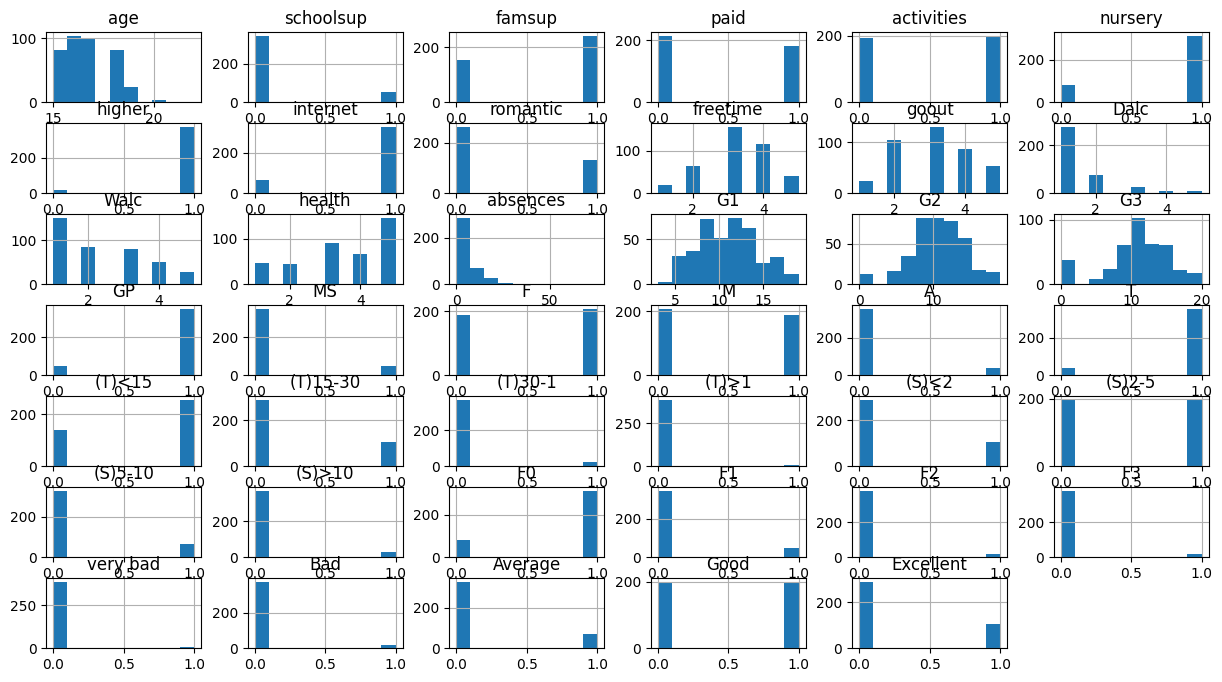

In [105]:
data.hist(figsize=(15,8))

In [106]:
data.select_dtypes(include=[np.number]).corr()

,age,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,freetime,...,(S)>10,F0,F1,F2,F3,very bad,Bad,Average,Good,Excellent
age,1.000000,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.016434,...,-0.084997,-0.288737,0.246083,0.040765,0.139667,-0.036237,-0.005064,-0.049157,0.024795,0.027807
schoolsup,-0.251811,1.000000,0.104681,-0.020753,0.046032,0.045967,0.054486,-0.009683,-0.080716,-0.045465,...,0.045293,-0.005255,0.012359,-0.007252,-0.002521,-0.055360,0.024470,0.004405,0.027526,-0.028728
famsup,-0.140609,0.104681,1.000000,0.293184,-0.001500,0.059536,0.100815,0.103581,0.012440,0.010538,...,0.071218,0.074633,-0.088040,0.040584,-0.047517,0.003643,-0.000694,-0.036629,0.088684,-0.069688
paid,-0.035933,-0.020753,0.293184,1.000000,-0.021382,0.102143,0.189214,0.153132,0.005536,-0.064253,...,0.073046,0.199962,-0.151458,-0.019776,-0.137415,0.048124,-0.103500,-0.029065,0.118353,-0.075363
activities,-0.103063,0.046032,-0.001500,-0.021382,1.000000,0.002731,0.096484,0.048663,0.019651,0.089728,...,0.045368,0.040218,0.008483,-0.016235,-0.080704,-0.002548,-0.028155,-0.021497,-0.002308,0.034980
nursery,-0.086632,0.045967,0.059536,0.102143,0.002731,1.000000,0.054303,0.007830,0.027495,-0.024696,...,0.038183,0.092036,-0.032942,-0.077673,-0.054674,-0.016002,0.050847,-0.067364,0.062550,-0.032028
higher,-0.209081,0.054486,0.100815,0.189214,0.096484,0.054303,1.000000,0.020374,-0.105664,-0.061244,...,0.062554,0.249349,-0.120447,-0.007922,-0.303979,0.033204,-0.004906,-0.047623,-0.002924,0.035626
internet,-0.112094,-0.009683,0.103581,0.153132,0.048663,0.007830,0.020374,1.000000,0.087122,0.051286,...,0.013752,0.085481,-0.094814,0.028106,-0.045665,-0.031954,0.000247,-0.047421,0.048624,-0.004420
romantic,0.164669,-0.080716,0.012440,0.005536,0.019651,0.027495,-0.105664,0.087122,1.000000,-0.011182,...,-0.085557,-0.108860,0.053123,0.140667,-0.009442,0.088644,-0.026126,-0.024511,0.084113,-0.089908
freetime,0.016434,-0.045465,0.010538,-0.064253,0.089728,-0.024696,-0.061244,0.051286,-0.011182,1.000000,...,-0.084040,-0.071375,0.039900,-0.037546,0.118851,-0.105995,-0.002896,-0.127791,0.046133,0.091882


In [107]:
from sklearn.model_selection import train_test_split
x=data.drop('G3',axis=1)
y=data['G3']

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [109]:
train_data=x_train.join(y_train)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,y_train = train_data.drop(['G3'],axis=1),train_data['G3']
x_train_s=scaler.fit_transform(x_train)#scaling the data to make the data in same scale
reg=LinearRegression()#creating the model
reg.fit(x_train_s,y_train)#fitting the model

LinearRegression()

In [111]:
x_test_s=scaler.transform(x_test)

In [117]:
reg.score(x_test_s,y_test)

0.842042904969573

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [119]:
y_pred_lr = reg.predict(x_test_s)

In [120]:
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R2 Score: 0.842042904969573
Linear Regression MAE: 1.204415870374455
Linear Regression RMSE: 1.830738720991074


In [121]:
# %%
import joblib

# Save the trained model
joblib.dump(reg, 'linear_regression_model.joblib')

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

print("Model and scaler have been saved successfully.")

Model and scaler have been saved successfully.
